# Top Anime of 2024 Analysis

The purpose of this project is to do exploratory data analysis (EDA) on the Top Anime Dataset of 2024. The dataset gives an overview of the top animes of 2024, with various attributes. This is a for fun project out of my love for some of the shows in the dataset.

#### Objectives:
1. Gain understanding of the distribution and trends of anime scores.
2. Analyze the popularity of animes.
3. Explore relationships between different features.
4. Identify key genres and studios.
5. Find and determine other relevant features.

#### Research Questions:
1. What is the general distribution of scores among the top animes in the dataset?
2. What are the top 10 animes with the highest average ratings?

### Imports & Loading Data

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
data = pd.read_csv('top_anime.csv')

### Data Preprocessing

In [70]:
data.head()

,Score,Popularity,Rank,Members,Description,Synonyms,Japanese,English,Type,Episodes,...,Premiered,Broadcast,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating
0,9.38,284,1,710,During their decade-long quest to defeat the D...,Frieren at the Funeral,葬送のフリーレン,Frieren: Beyond Journey's End,TV,28,...,Fall 2023,Fridays at 23:00 (JST),"Aniplex, Dentsu, Shogakukan-Shueisha Productio...","None found, add some",Madhouse,Manga,"AdventureAdventure, DramaDrama, FantasyFantasy",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older
1,9.09,3,2,3,After a horrific alchemy experiment goes wrong...,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist: Brotherhood,TV,64,...,Spring 2009,Sundays at 17:00 (JST),"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,"ActionAction, AdventureAdventure, DramaDrama, ...",ShounenShounen,24 min. per ep.,R - 17+ (violence & profanity)
2,9.07,13,3,2,Eccentric scientist Rintarou Okabe has a never...,NaN,STEINS;GATE,Steins;Gate,TV,24,...,Spring 2011,Wednesdays at 02:05 (JST),"Frontier Works, Media Factory, Kadokawa Shoten...",Funimation,White Fox,Visual novel,"DramaDrama, Sci-FiSci-Fi, SuspenseSuspense",NaN,24 min. per ep.,PG-13 - Teens 13 or older
3,9.06,342,4,630,"Gintoki, Shinpachi, and Kagura return as the f...",Gintama' (2015),銀魂°,Gintama Season 4,TV,51,...,Spring 2015,Wednesdays at 18:00 (JST),"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, Sci-FiSci-Fi",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older
4,9.05,21,5,2,Seeking to restore humanity's diminishing hope...,NaN,進撃の巨人 Season3 Part.2,Attack on Titan Season 3 Part 2,TV,10,...,Spring 2019,Mondays at 00:10 (JST),"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,"ActionAction, DramaDrama, SuspenseSuspense",ShounenShounen,23 min. per ep.,R - 17+ (violence & profanity)


In [71]:
print(data.columns)
print('--'*20)
print("The data has a shape of", data.shape)


Index(['Score', 'Popularity', 'Rank', 'Members', 'Description', 'Synonyms',
       'Japanese', 'English', 'Type', 'Episodes', 'Status', 'Aired',
       'Premiered', 'Broadcast', 'Producers', 'Licensors', 'Studios', 'Source',
       'Genres', 'Demographic', 'Duration', 'Rating'],
      dtype='object')
----------------------------------------
The data has a shape of (1000, 22)


In [72]:
data.describe()

,Score,Popularity,Rank,Members
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,8.156580,1805.637000,500.500000,223.648000
std,0.284344,1888.308553,288.819436,246.288299
min,7.800000,1.000000,1.000000,1.000000
25%,7.920000,413.750000,250.750000,31.750000
50%,8.100000,1139.500000,500.500000,132.000000
75%,8.312500,2633.750000,750.250000,330.000000
max,9.380000,12043.000000,1000.000000,998.000000


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Score        1000 non-null   float64
 1   Popularity   1000 non-null   int64  
 2   Rank         1000 non-null   int64  
 3   Members      1000 non-null   int64  
 4   Description  1000 non-null   object 
 5   Synonyms     709 non-null    object 
 6   Japanese     999 non-null    object 
 7   English      859 non-null    object 
 8   Type         1000 non-null   object 
 9   Episodes     1000 non-null   object 
 10  Status       1000 non-null   object 
 11  Aired        1000 non-null   object 
 12  Premiered    569 non-null    object 
 13  Broadcast    569 non-null    object 
 14  Producers    1000 non-null   object 
 15  Licensors    1000 non-null   object 
 16  Studios      1000 non-null   object 
 17  Source       1000 non-null   object 
 18  Genres       771 non-null    object 
 19  Demogra

In [74]:
# Checking for missing values
data.isnull().sum()


Score            0
Popularity       0
Rank             0
Members          0
Description      0
Synonyms       291
Japanese         1
English        141
Type             0
Episodes         0
Status           0
Aired            0
Premiered      431
Broadcast      431
Producers        0
Licensors        0
Studios          0
Source           0
Genres         229
Demographic    479
Duration         0
Rating           0
dtype: int64

In [75]:
# Impute & drop missing values
from sklearn.impute import SimpleImputer

# Separate numeric and non-numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = data.select_dtypes(exclude=['float64', 'int64']).columns

# Impute missing values for numeric columns with mean method
numeric_imputer = SimpleImputer(strategy='mean')
data[numeric_cols] = numeric_imputer.fit_transform(data[numeric_cols])

# Impute missing values for non-numeric columns with most frequent method
non_numeric_imputer = SimpleImputer(strategy='most_frequent')
data[non_numeric_cols] = non_numeric_imputer.fit_transform(data[non_numeric_cols])

In [76]:
#Checking if missing values were dropped successfully
print(data.isnull().sum())
print('Data now has no missing values')

Score          0
Popularity     0
Rank           0
Members        0
Description    0
Synonyms       0
Japanese       0
English        0
Type           0
Episodes       0
Status         0
Aired          0
Premiered      0
Broadcast      0
Producers      0
Licensors      0
Studios        0
Source         0
Genres         0
Demographic    0
Duration       0
Rating         0
dtype: int64
Data now has no missing values


In [77]:
# Removing potential duplicates
data = data.drop_duplicates()

In [78]:
# Converting to appropriate data types
data['Rank'] = data['Rank'].astype(int)
data['Members'] = data['Members'].astype(int)
data['Genres'] = data['Genres'].astype(str)

# Convert date columns to datetime objects
data['Aired'] = pd.to_datetime(data['Aired'], errors='coerce')
data['Premiered'] = pd.to_datetime(data['Premiered'], errors='coerce')

/var/folders/h_/bs92p1l96qx1sf852_cmmsp80000gn/T/ipykernel_5491/2701074565.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Aired'] = pd.to_datetime(data['Aired'], errors='coerce')
/var/folders/h_/bs92p1l96qx1sf852_cmmsp80000gn/T/ipykernel_5491/2701074565.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Premiered'] = pd.to_datetime(data['Premiered'], errors='coerce')


### Feature Engineering

In [79]:
data['Aired'] = data['Aired'].replace(np.nan, '1900-01-01')
print(data['Aired'].dt.year)

print('--'*20)

data['Premiered'] = data['Premiered'].replace(np.nan, '2003-5-9')
print(data['Premiered'].dt.month)

print('--'*20)
# ADD column for: count the number of genres for each anime:
data['Num_Genres'] = data['Genres'].apply(lambda x: len(x.split(',')))
print(data['Num_Genres'])

0      1900
1      1900
2      1900
3      1900
4      1900
       ... 
995    2009
996    1900
997    2005
998    2008
999    2014
Name: Aired, Length: 1000, dtype: int32
----------------------------------------
0      5
1      5
2      5
3      5
4      5
      ..
995    5
996    5
997    5
998    5
999    5
Name: Premiered, Length: 1000, dtype: int32
----------------------------------------
0      3
1      4
2      3
3      3
4      3
      ..
995    3
996    3
997    3
998    3
999    3
Name: Num_Genres, Length: 1000, dtype: int64


In [80]:
# Create a binary column indicating if the anime has more than 50 episodes
data['Episodes'] = pd.to_numeric(data['Episodes'], errors='coerce')
data['More_Than_50_Episodes'] = data['Episodes'].apply(lambda x: 1 if (pd.notnull(x) and x > 50) else 0)
print(data['More_Than_50_Episodes'])

print('--'*20)

print(data.shape)

# dropping the 2 new columns as they are now unnecessary
data = data.drop(['Num_Genres', 'More_Than_50_Episodes'], axis=1)

0      0
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: More_Than_50_Episodes, Length: 1000, dtype: int64
----------------------------------------
(1000, 24)


### Normalizing Data

In [81]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalizing the numeric columns
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

#standardize the data in place
data[numeric_cols] = standard_scaler.fit_transform(data[numeric_cols])

#normalize the data in place
data[numeric_cols] = minmax_scaler.fit_transform(data[numeric_cols])

#Display

print("Standardized and Normalized Data")
print(data.head())

Standardized and Normalized Data
      Score  Popularity      Rank   Members  \
0  1.000000    0.023501  0.000000  0.711133   
1  0.816456    0.000166  0.001001  0.002006   
2  0.803797    0.000997  0.002002  0.001003   
3  0.797468    0.028318  0.003003  0.630893   
4  0.791139    0.001661  0.004004  0.001003   

                                         Description  \
0  During their decade-long quest to defeat the D...   
1  After a horrific alchemy experiment goes wrong...   
2  Eccentric scientist Rintarou Okabe has a never...   
3  Gintoki, Shinpachi, and Kagura return as the f...   
4  Seeking to restore humanity's diminishing hope...   

                                            Synonyms  \
0                             Frieren at the Funeral   
1  Hagane no Renkinjutsushi: Fullmetal Alchemist,...   
2                                           Bokuyaba   
3                                    Gintama' (2015)   
4                                           Bokuyaba   

          

In [82]:
data.describe()

,Score,Popularity,Rank,Members,Episodes,Aired,Premiered
count,1000.000000,1000.000000,1000.000000,1000.000000,997.000000,1000,1000
mean,0.225684,0.149862,0.500000,0.223318,19.865597,1935-11-11 04:39:21.600000,2003-05-09 00:00:00
min,0.000000,0.000000,0.000000,0.000000,1.000000,1900-01-01 00:00:00,2003-05-09 00:00:00
25%,0.075949,0.034276,0.250000,0.030843,1.000000,1900-01-01 00:00:00,2003-05-09 00:00:00
50%,0.189873,0.094544,0.500000,0.131394,12.000000,1900-01-01 00:00:00,2003-05-09 00:00:00
75%,0.324367,0.218631,0.750000,0.329990,24.000000,2008-07-26 00:00:00,2003-05-09 00:00:00
max,1.000000,1.000000,1.000000,1.000000,1787.000000,2024-04-17 00:00:00,2003-05-09 00:00:00
std,0.179965,0.156810,0.289109,0.247029,65.777021,NaN,NaN


### Data Analysis

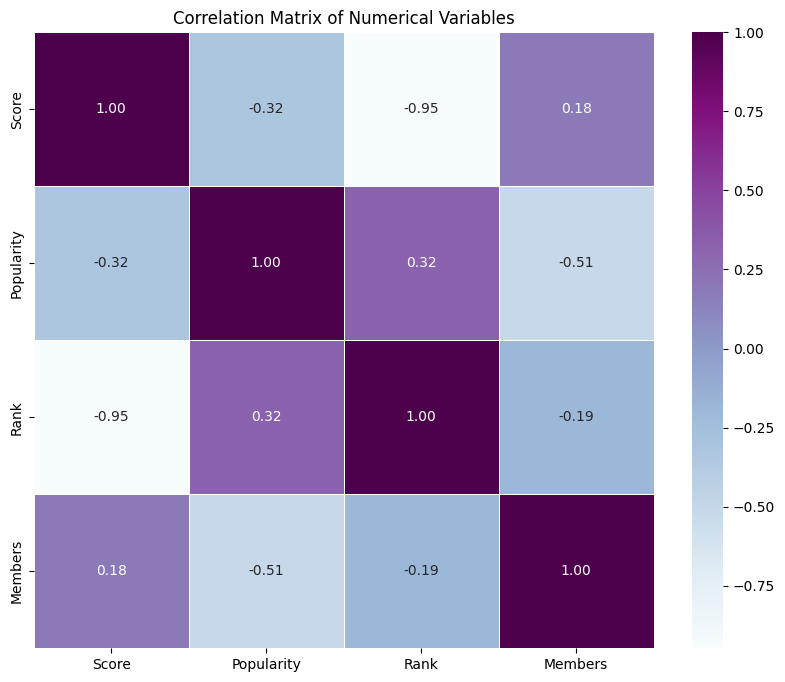

In [83]:
# Create correlation matrix of numerical variables
correlation_matrix = data[['Score', 'Popularity', 'Rank', 'Members']].corr()
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap = 'BuPu', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

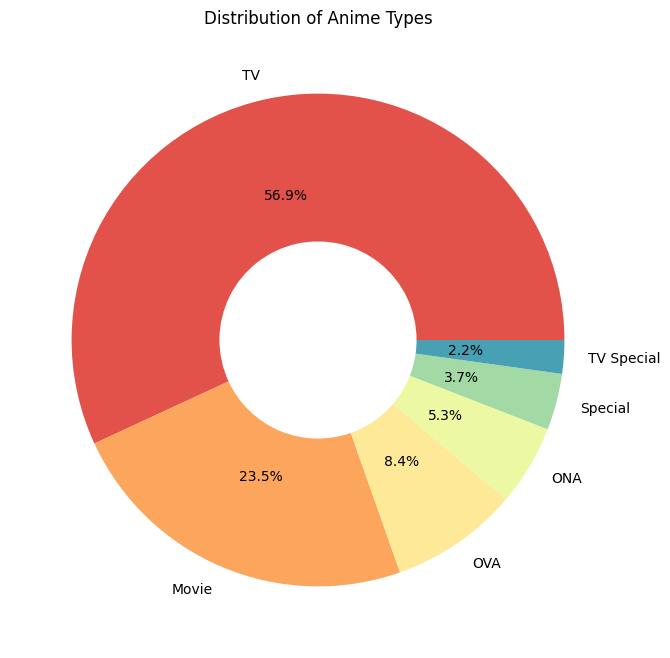

In [84]:
palette = sns.color_palette("Spectral")
# get counts of each anime type
type_counts = data['Type'].value_counts()
# plot the counts
plt.figure(figsize=(10, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', wedgeprops=dict(width=0.6), colors=palette)
plt.title('Distribution of Anime Types')
plt.show()

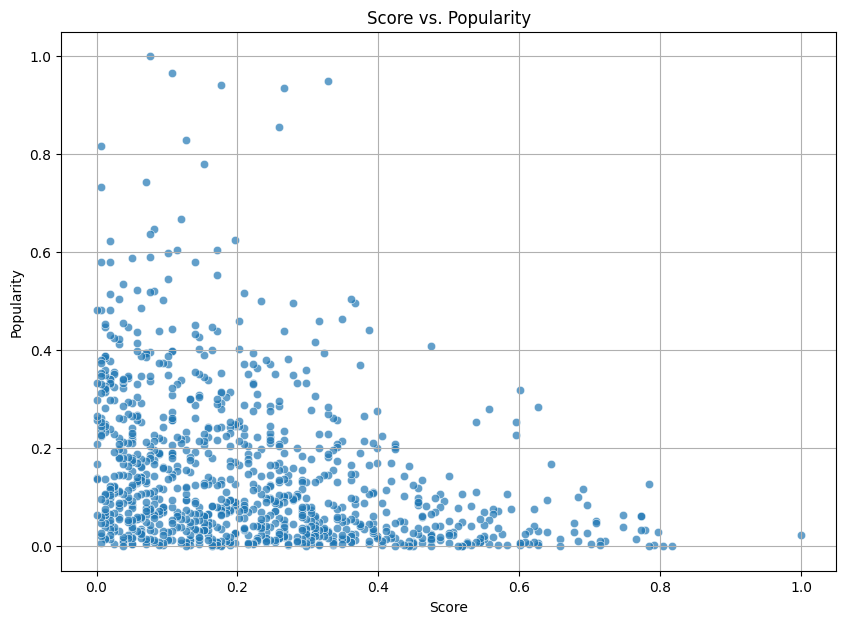

In [85]:
# Plot scatterplot of Score vs. Popularity
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Score', y='Popularity', data=data, alpha = 0.7)
plt.title('Score vs. Popularity')
plt.xlabel('Score')
plt.ylabel('Popularity')
plt.grid()
plt.show()

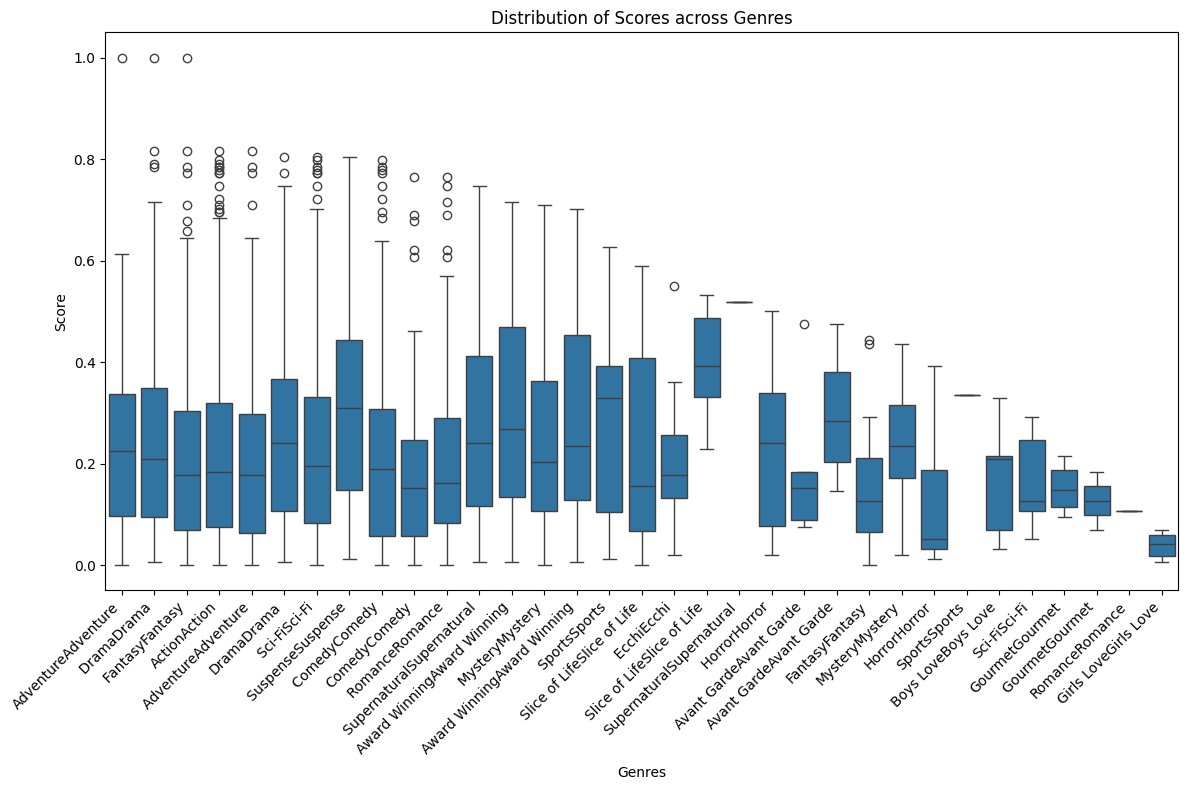

In [86]:
# Split the 'Genres' column into multiple genres 
data['Genres'] = data['Genres'].str.split(',') #splitting the genres by comma

# Create a new DataFrame where each row corresponds to a single genre-score pair
genre_score_data = data.explode('Genres')[['Genres', 'Score']] #takes columns to explode

# Plotting
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genres', y='Score', data=genre_score_data)
plt.title('Distribution of Scores across Genres')
plt.xlabel('Genres')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels overlapping
plt.show()

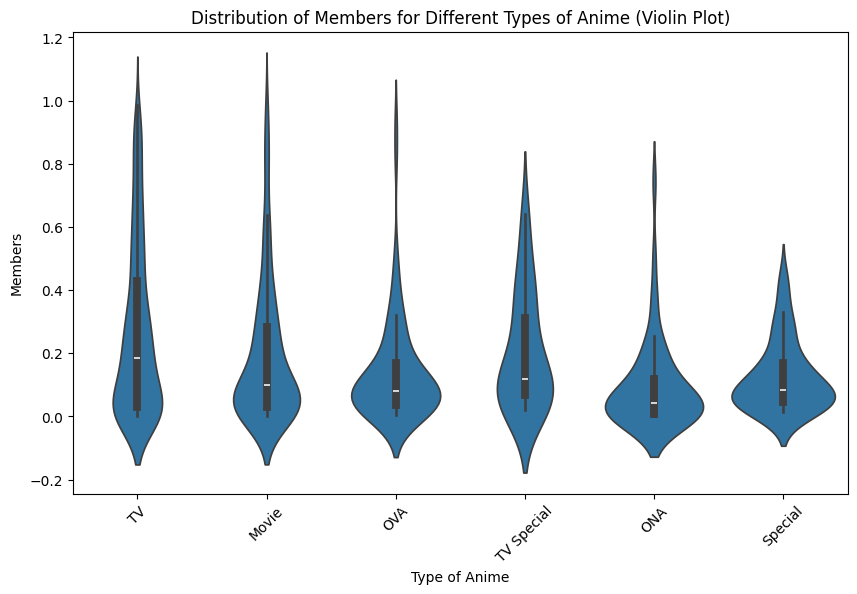

In [87]:
# Violin plot of Members for different types of anime
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Type', y='Members')
plt.xlabel('Type of Anime')
plt.ylabel('Members')
plt.title('Distribution of Members for Different Types of Anime (Violin Plot)')
plt.xticks(rotation=45)
plt.show()

/var/folders/h_/bs92p1l96qx1sf852_cmmsp80000gn/T/ipykernel_5491/2832790878.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[genre[1] for genre in sorted_genres], y=[genre[0] for genre in sorted_genres], palette = palette)
/var/folders/h_/bs92p1l96qx1sf852_cmmsp80000gn/T/ipykernel_5491/2832790878.py:12: UserWarning: 
The palette list has fewer values (6) than needed (33) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=[genre[1] for genre in sorted_genres], y=[genre[0] for genre in sorted_genres], palette = palette)


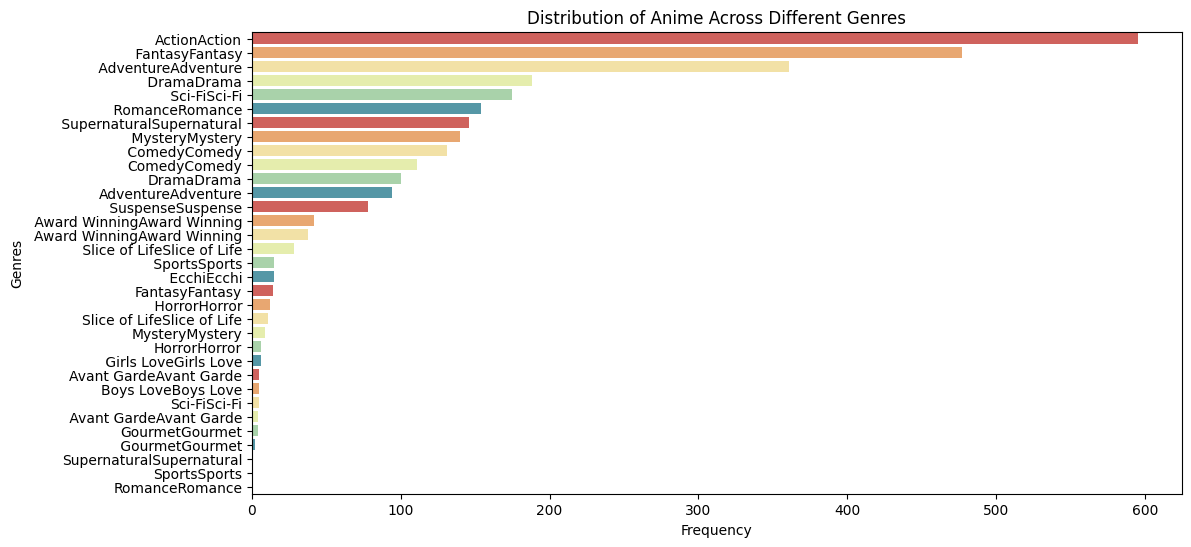

In [89]:
# Counting the frequency of each genre
genre_counts = {}
for genre_list in data['Genres']:
    for genre in genre_list:
        genre_counts[genre] = genre_counts.get(genre, 0) + 1

# Sorting genres by frequency
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

# Bar plot to visualize frequency
plt.figure(figsize=(12, 6))
sns.barplot(x=[genre[1] for genre in sorted_genres], y=[genre[0] for genre in sorted_genres], palette = palette)
plt.xlabel('Frequency')
plt.ylabel('Genres')
plt.title('Distribution of Anime Across Different Genres')
plt.show()

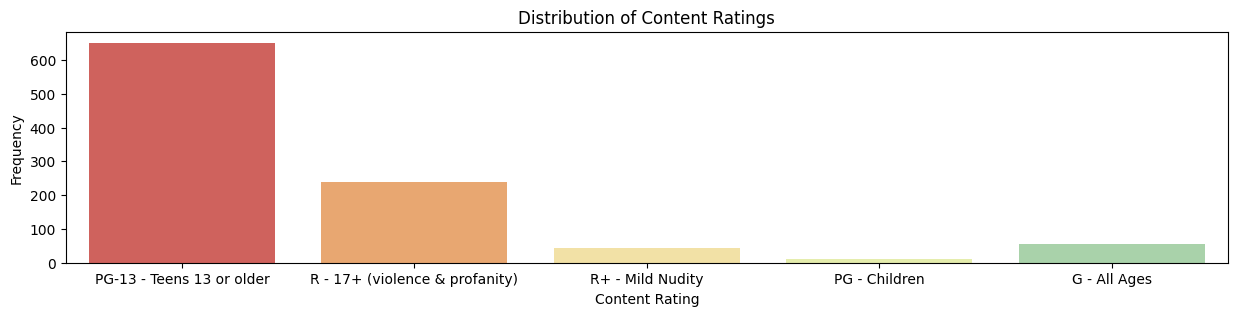

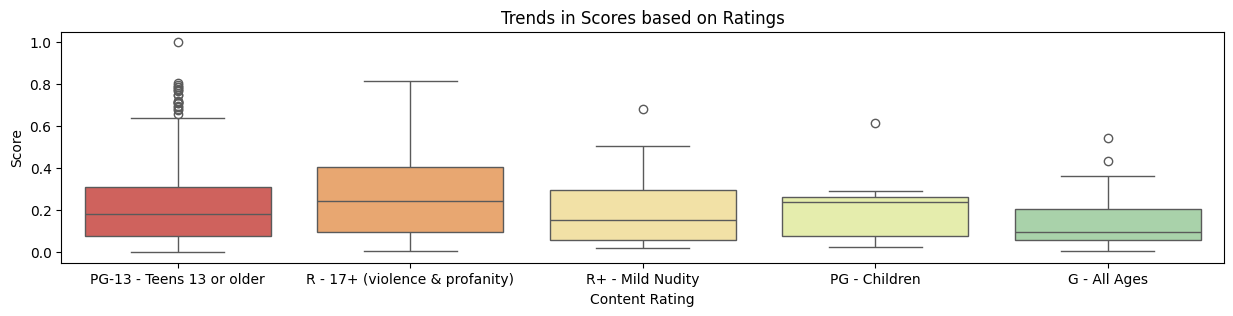

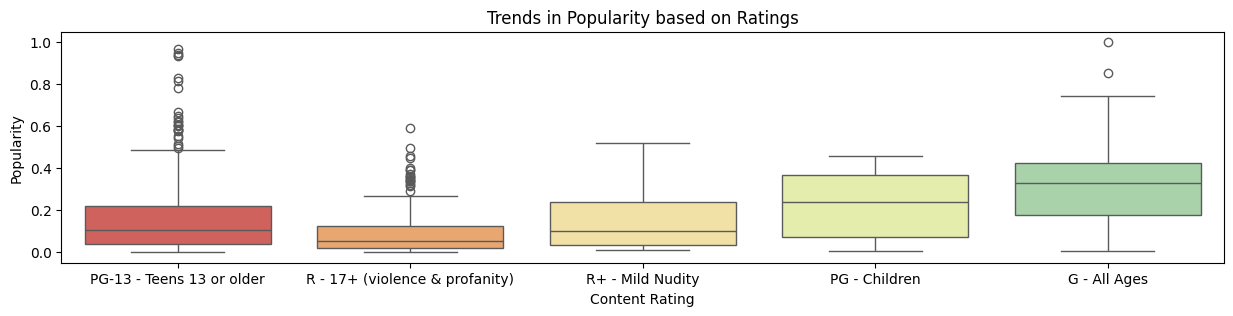

In [92]:
# Plot the distribution of content ratings
plt.figure(figsize=(15, 3))
sns.countplot(data=data, x='Rating', palette = palette)
plt.xlabel('Content Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Content Ratings')
plt.show()

# Analyze patterns in Scores based on ratings using box plots
plt.figure(figsize=(15, 3))
sns.boxplot(data=data, x='Rating', y='Score', palette = palette)
plt.xlabel('Content Rating')
plt.ylabel('Score')
plt.title('Trends in Scores based on Ratings')
plt.show()

# Analyze trends in Popularity based on ratings using box plots
plt.figure(figsize=(15, 3))
sns.boxplot(data=data, x='Rating', y='Popularity', palette = palette)
plt.xlabel('Content Rating')
plt.ylabel('Popularity')
plt.title('Trends in Popularity based on Ratings')
plt.show()

# get rid of depreciation warnings
import warnings
warnings.filterwarnings('ignore')


## Answering Questions

### 1. What is the general distribution of scores among the top animes in the dataset?

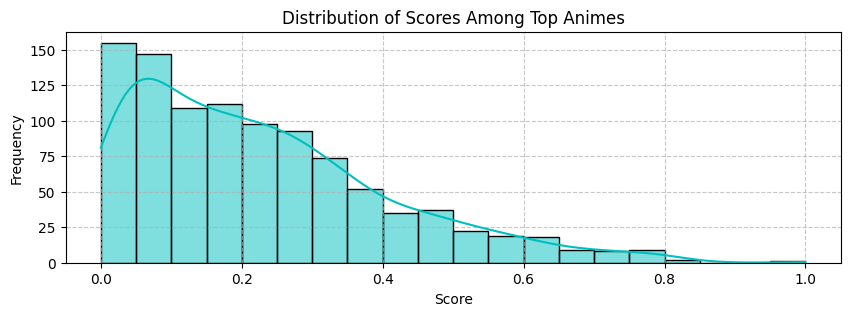

In [93]:
# Filter the dataset to consider only the top animes 
top_animes = data[data['Rank'] <= 100]
# Create a histogram plot of the scores
plt.figure(figsize=(10,3))
sns.histplot(top_animes['Score'], kde=True, color='c', bins=20)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores Among Top Animes')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 2. What are the top 10 animes with the highest average ratings?

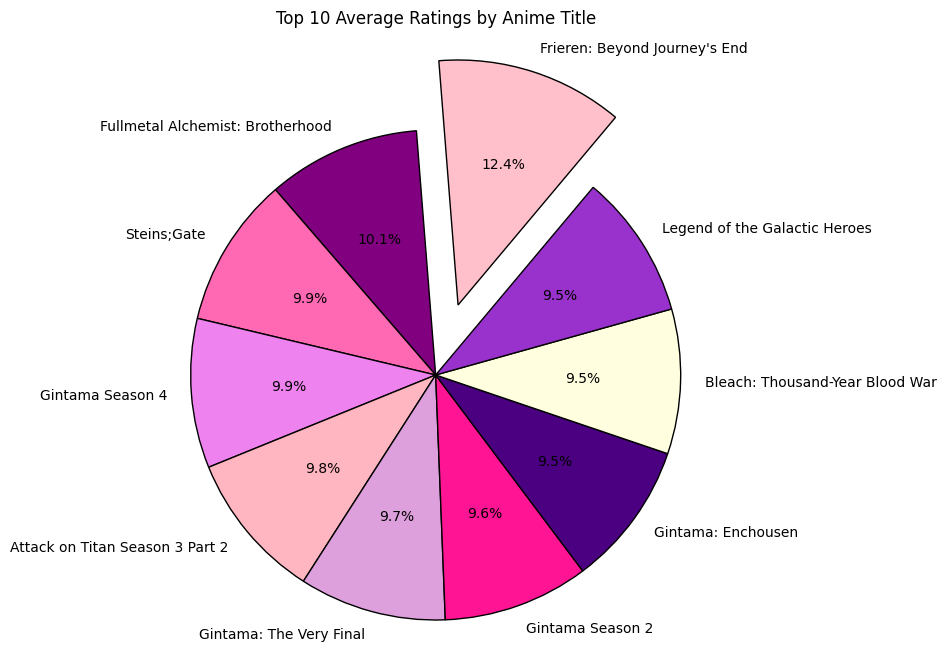

In [98]:
top_10_avg = data.groupby('English')['Score'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 8))
colors = ['pink','purple','hotpink','violet','lightpink','plum','deeppink','indigo','lightyellow','darkorchid']
explode=(0.3,0,0,0,0,0,0,0,0,0)   #to make a distance in selected bar
plt.pie(top_10_avg,colors=colors,explode=explode,wedgeprops={'edgecolor':'black'},labels=top_10_avg.index, autopct='%1.1f%%', startangle=50)
plt.title('Top 10 Average Ratings by Anime Title')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()